# Problem Statement


Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

# Basic Metrics

In [65]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
#load Data
data=pd.read_csv('netflix_data.csv')

In [134]:
#First five rows of the data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
#Columns of the data
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Basic Analysis

In [69]:
#shape of the data
data.shape

(8807, 12)

In [70]:
#Datatype of columns
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [71]:
#conversion of catergorical attributes to category
data['type'] = data['type'].astype('category')
data['country'] = data['country'].astype('category')
data['rating'] = data['rating'].astype('category')
data['listed_in'] = data['listed_in'].astype('category')

In [72]:
# missing values
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
# missing values
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [74]:
#statistical analysis
data.describe(include='category')

,type,country,rating,listed_in
count,8807,7976,8803,8807
unique,2,748,17,514
top,Movie,United States,TV-MA,"Dramas, International Movies"
freq,6131,2818,3207,362


# Exploratory data Analysis

## Non-Graphical Analysis

### all Content Types

In [75]:
#Unique Attributes
data.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [76]:
data['show_id']

,show_id
0,s1
1,s2
2,s3
3,s4
4,s5
...,...
8802,s8803
8803,s8804
8804,s8805
8805,s8806


In [77]:
# Value Counts
data['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [78]:
data['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [79]:
data['release_year'].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


In [80]:
data['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"February 2, 2017",1
"September 11, 2019",1
"May 17, 2015",1


In [21]:
#Preprocessing Data


In [81]:
#unnesting director
directors=[]
for items in data['director']:
    if pd.notna(items): # Check if the value is not NaN
        directors.extend(items.split(','))
pd.Series(directors).value_counts()

,count
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Marcus Raboy,16
...,...
Jung Ji-woo,1
Azazel Jacobs,1
Zhang Yimou,1
Phillip Youmans,1


In [82]:
#unnesting cast
cast=[]
for items in data['cast']:
    if pd.notna(items):
        cast.extend(items.split(','))

pd.Series(cast).value_counts()

,count
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
...,...
Melanie Straub,1
Gabriela Maria Schmeide,1
Helena Zengel,1
Daniel Valenzuela,1


In [83]:
#unnesting country
country=[]
for items in data['country']:
    if pd.notna(items):
        country.extend(items.split(','))

pd.Series(country).value_counts()

,count
United States,3211
India,1008
United Kingdom,628
United States,479
Canada,271
...,...
Panama,1
Namibia,1
Uganda,1
East Germany,1


In [84]:
#unnesting listed in/Genres
listed_in=[]
for items in data['listed_in']:
    if pd.notna(items):
        listed_in.extend(items.split(','))
data_genres=pd.Series(listed_in)
data_genres.value_counts()

,count
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
LGBTQ Movies,1
TV Sci-Fi & Fantasy,1


In [146]:
# split the date added into year,month,date and day of the week
data['date_added'] = pd.to_datetime(data['date_added'],format='mixed')
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month_name()
data['day_added']=data['date_added'].dt.day
data['day of the week added']=data['date_added'].dt.day_name()

### Movies

In [132]:
data_movies=data[data['type']=='Movie']
data_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,day of the week added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,25.0,Saturday
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,September,24.0,Friday
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,September,24.0,Friday
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,September,24.0,Friday
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,September,23.0,Thursday


In [96]:
data_movies['release_year'].value_counts()

,count
release_year,
2017,767
2018,767
2016,658
2019,633
2020,517
...,...
1959,1
1963,1
1966,1


In [105]:
data_movies['date_added'].value_counts()

,count
date_added,
2020-01-01,97
2019-11-01,75
2018-03-01,72
2019-12-31,67
2018-10-01,64
...,...
2019-06-23,1
2018-12-23,1
2019-10-26,1


In [107]:
#unnesting movie directors
directors_movie=[]
for items in data_movies['director']:
    if pd.notna(items): # Check if the value is not NaN
        directors_movie.extend(items.split(','))
pd.Series(directors_movie).value_counts()

,count
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
Marcus Raboy,15
...,...
Adam Salky,1
Pablo Azorín Williams,1
Pedro de Echave García,1
Christian Schwochow,1


In [111]:
#unnesting country where movies are directed
country_movie=[]
for items in data_movies['country']:
    if pd.notna(items):
        country_movie.extend(items.split(','))

pd.Series(country_movie).value_counts()

,count
United States,2364
India,927
United States,388
United Kingdom,382
Canada,187
...,...
Namibia,1
Uganda,1
East Germany,1
Croatia,1


In [116]:
#unnesting Genres of movies
listed_in_movie=[]
for items in data_movies['listed_in']:
    if pd.notna(items):
        listed_in_movie.extend(items.split(','))
pd.Series(listed_in_movie).value_counts()

,count
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
Independent Movies,736
Romantic Movies,613
Children & Family Movies,605
Thrillers,512


In [118]:
data_movies['rating'].value_counts()

,count
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


In [122]:
#Year in which most number of movies are added
data_movies['year_added'].value_counts()

,count
year_added,
2019.0,1424
2020.0,1284
2018.0,1237
2021.0,993
2017.0,839
2016.0,253
2015.0,56
2014.0,19
2011.0,13


In [120]:
#month in which most number of movies are added
data_movies['month_added'].value_counts()

,count
month_added,
July,565
April,550
December,547
January,546
October,545
March,529
September,519
August,519
November,498


In [123]:
#day of the week when most number of movies are added
data_movies['day of the week added'].value_counts()

,count
day of the week added,
Friday,1566
Thursday,1053
Wednesday,906
Tuesday,852
Monday,628
Sunday,569
Saturday,557


### Shows

In [109]:
data_shows=data[data['type']=='TV Show']
data_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,day of the week added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,24.0,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,24.0,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,24.0,Friday
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,September,24.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,May,1.0,Tuesday
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,January,17.0,Tuesday
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,September,13.0,Thursday
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,December,15.0,Thursday


In [108]:
#unnesting shows director
directors_shows=[]
for items in data_shows['director']:
    if pd.notna(items): # Check if the value is not NaN
        directors_shows.extend(items.split(','))
pd.Series(directors_shows).value_counts()

,count
Ken Burns,3
Alastair Fothergill,3
Shin Won-ho,2
Iginio Straffi,2
Stan Lathan,2
...,...
Picky Talarico,1
Pedro Waddington,1
Andrucha Waddington,1
Alexx Media,1


In [114]:
#unnesting country where shows are directed
country_show=[]
for items in data_shows['country']:
    if pd.notna(items):
        country_show.extend(items.split(','))

pd.Series(country_show).value_counts().head(3)

,count
United States,847
United Kingdom,246
Japan,174


In [117]:
#unnesting Genres of shows
listed_in_show=[]
for items in data_shows['listed_in']:
    if pd.notna(items):
        listed_in_show.extend(items.split(','))
pd.Series(listed_in_show).value_counts()

,count
International TV Shows,774
TV Dramas,696
International TV Shows,577
TV Comedies,461
Crime TV Shows,399
Kids' TV,388
Romantic TV Shows,338
British TV Shows,253
Docuseries,221
Anime Series,176


In [119]:
data_shows['rating'].value_counts()

,count
rating,
TV-MA,1145
TV-14,733
TV-PG,323
TV-Y7,195
TV-Y,176
TV-G,94
NR,5
R,2
TV-Y7-FV,1


In [124]:
#Year in which most number of shows are added
data_shows['year_added'].value_counts()

,count
year_added,
2020.0,595
2019.0,592
2021.0,505
2018.0,412
2017.0,349
2016.0,176
2015.0,26
2014.0,5
2013.0,5


In [126]:
#month in which most number of shows are added
data_shows['month_added'].value_counts()

,count
month_added,
December,266
July,262
September,251
August,236
June,236
October,215
April,214
March,213
November,207


In [127]:
#day of the week in which most number of shows are added
data_shows['day of the week added'].value_counts()

,count
day of the week added,
Friday,932
Wednesday,382
Tuesday,345
Thursday,343
Saturday,259
Monday,223
Sunday,182


## Visual Analysis

### all Content Types

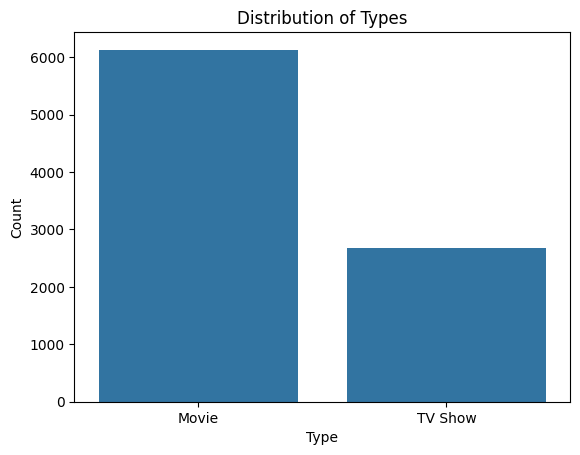

In [144]:
#based on type of the data
plt.figure()
sns.countplot(data,x='type')
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

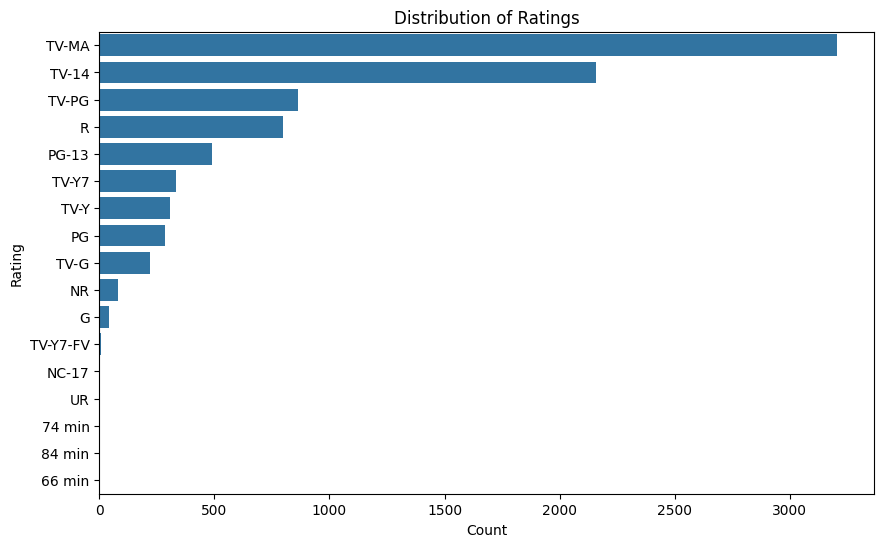

In [168]:
#Distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(data,y='rating',order=data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.ylabel('Rating')
plt.xlabel('Count')
plt.show()

<Axes: xlabel='count', ylabel='country'>

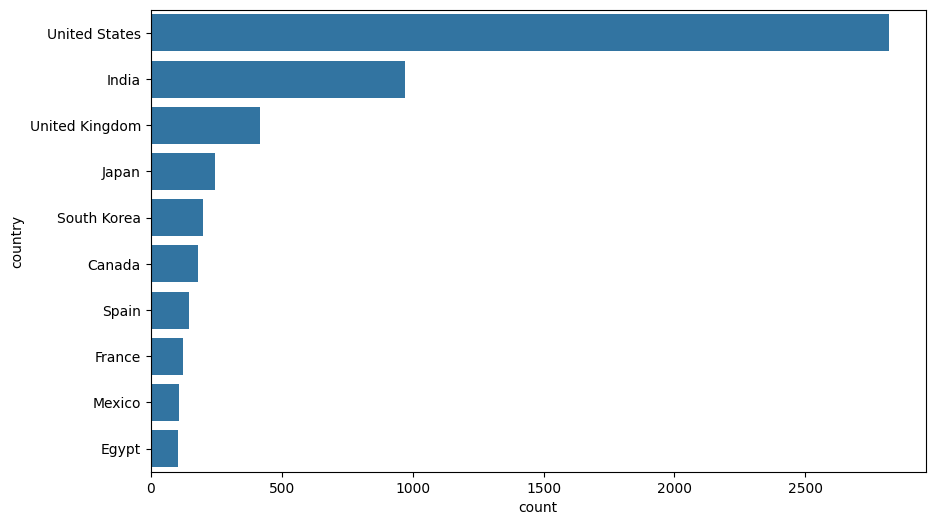

In [157]:
#Top 10 Countries with most content
plt.figure(figsize=(10,6))
sns.countplot(data,y='country',order=data['country'].value_counts().index[:10])

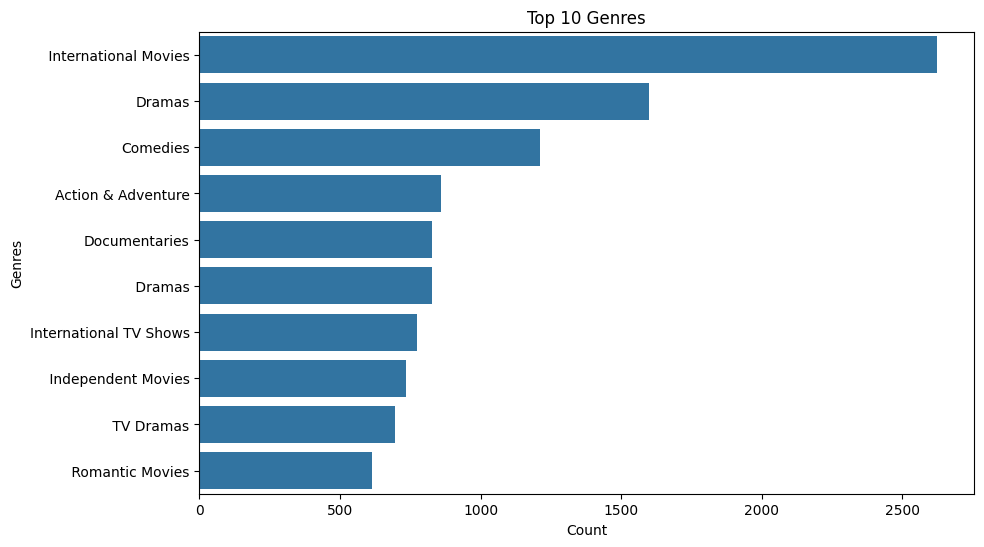

In [163]:
# Top 10 Genres
all_genres=data_genres.to_frame(name='Genres').reset_index(drop=True)
plt.figure(figsize=(10,6))
sns.countplot(data=all_genres,y='Genres',order=all_genres['Genres'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

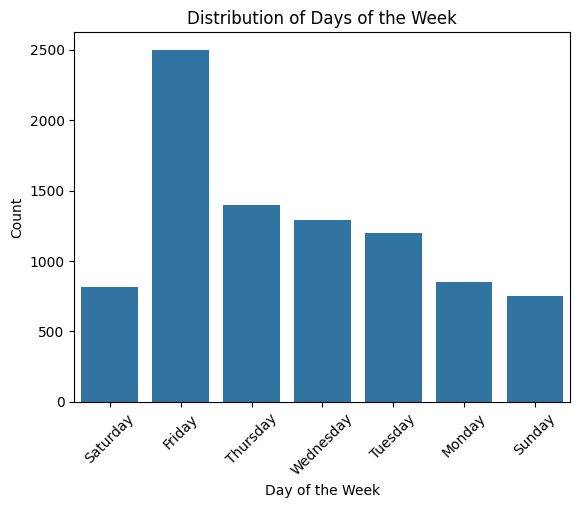

In [148]:
#day of the week with most releases
plt.figure()
sns.countplot(data,x='day of the week added')
plt.title('Distribution of Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

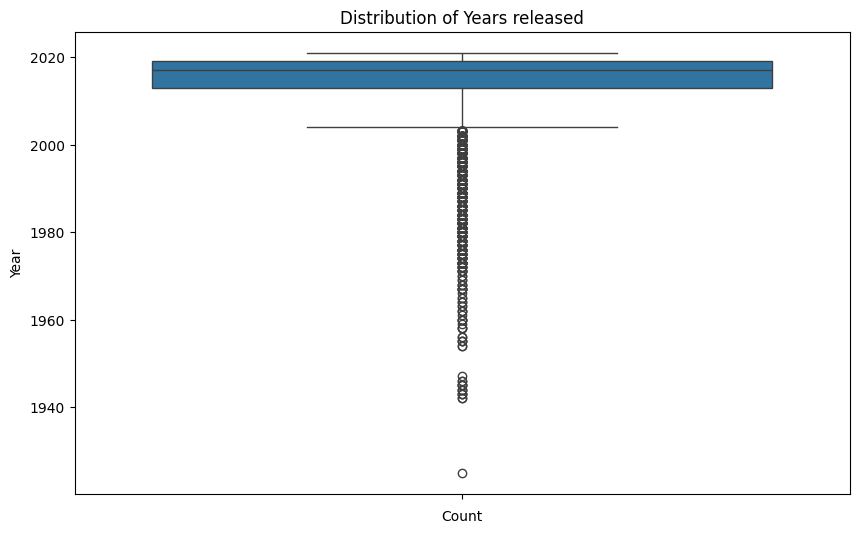

In [177]:
#Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=data,y='release_year')
plt.title('Distribution of Years released')
plt.ylabel('Year')
plt.xlabel('Count')
plt.show()

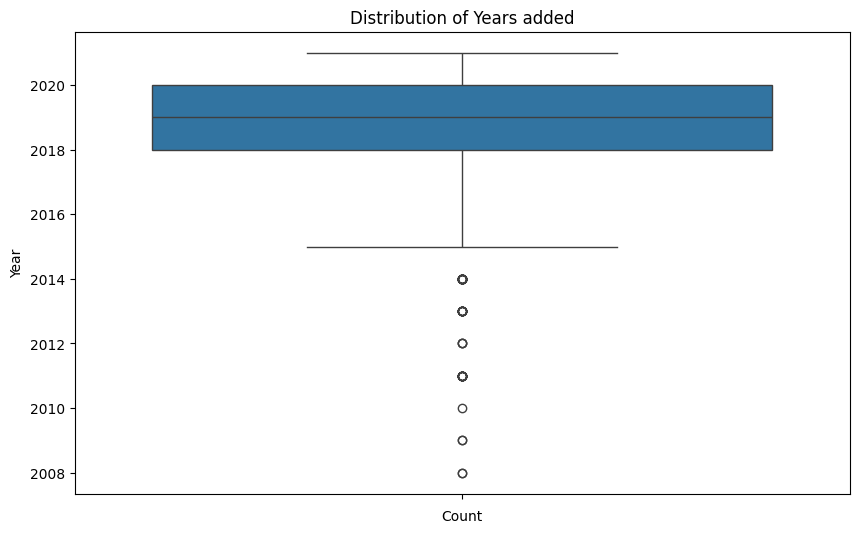

In [176]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,y='year_added')
plt.title('Distribution of Years added')
plt.ylabel('Year')
plt.xlabel('Count')
plt.show()

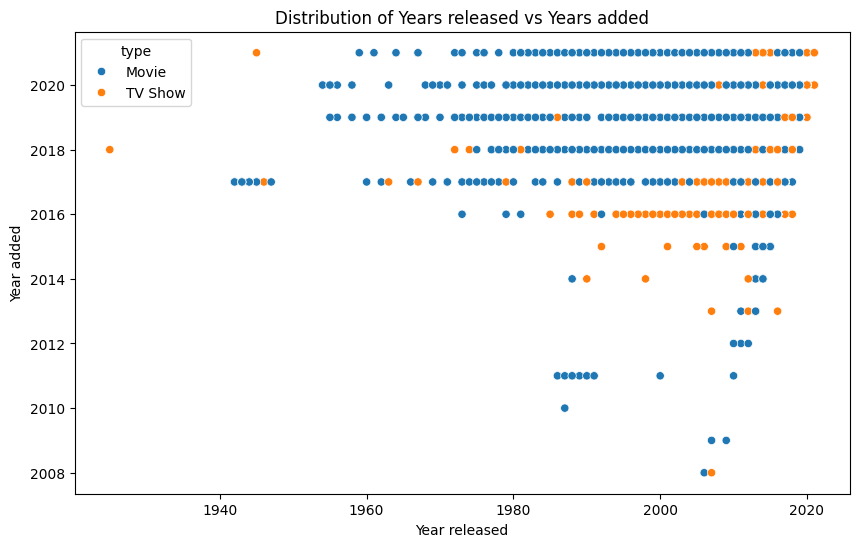

In [190]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='release_year',y='year_added',hue='type')
plt.title('Distribution of Years released vs Years added')
plt.ylabel('Year added')
plt.xlabel('Year released')
plt.show()

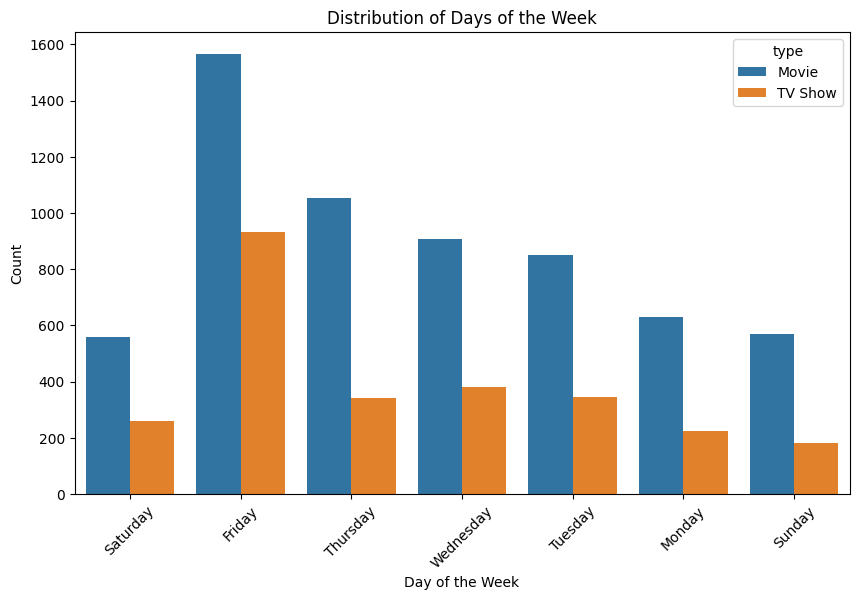

In [189]:

plt.figure(figsize=(10,6))
sns.countplot(data=data,x='day of the week added',hue='type')
plt.title('Distribution of Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Movies

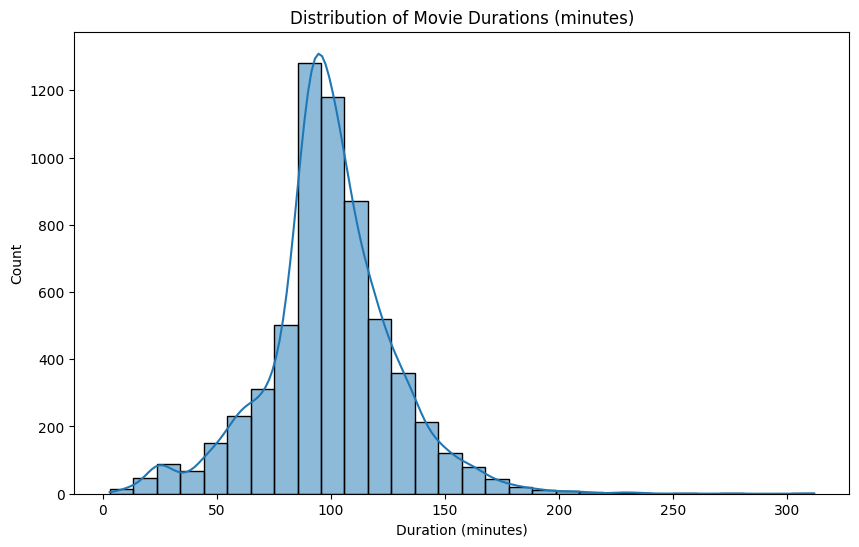

In [139]:
#Distribution of Movie Durations
data_movdur = data[(data['type'] == 'Movie') & (data['duration'].notna())].copy()
data_movdur['duration_minutes'] = data_movdur['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(data_movdur, x='duration_minutes', bins=30, kde=True)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

### Shows

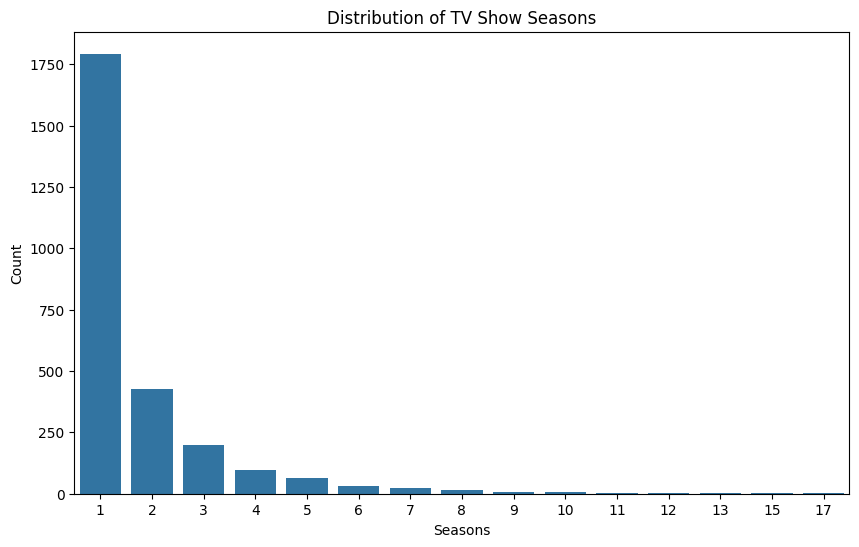

In [142]:
#Distribution of TV show seasons
data_tvseasons=data[(data['type']=='TV Show') & (data['duration'].notna())].copy()
data_tvseasons['seasons'] = data_tvseasons['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)
plt.figure(figsize=(10,6))
sns.countplot(data=data_tvseasons, x='seasons')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

# Insights based on Non-Graphical and Visual Analysis

 **comments on the attributes**


* The type attribute has limited range of values i.e, Movies and TV Shows.  
* The release year has wide range of attributes from the early 20th century to the recent years.
* The years content was added to netflix is more concentrated in recent years particularly from 2008 onwards.
* There is a diverse range of ratings and there are different countries where the content is produced and few countries contributing largely.




**comments on distribution of variables**


* The distribution of content type is clearly skewed, with Movies making up a much larger proportion (around 70%) compared to TV Shows (around 30%). This is evident from the count plot.
* The duration of movies primarily ranges from around 70 minutes to 120 minutes, with a peak around 90-100 minutes, as shown in the histogram. There are some outliers with significantly longer durations.
* The number of seasons for TV shows is heavily skewed towards a smaller number of seasons, with the majority of TV shows having only 1 or 2 seasons. While there are shows with more seasons, they are less frequent.




**comments based on visual analysis**


* From the countplot the distribution of content type is clearly skewed, with Movies making up a much larger proportion compared to TV Shows.
* The scatter plot and histograms show a clear concentration of content from more recent years being added to Netflix, especially from the early 2000s onwards. There's a long tail stretching back to much older films.
* The distribution of movie durations is unimodal and appears roughly bell-shaped, centered around 90-100 minutes. This suggests a typical movie length on the platform. The histogram shows this distribution clearly.
* The distribution of the number of seasons for TV shows is heavily right-skewed. The vast majority of TV shows have 1 or 2 seasons, with significantly fewer shows having more seasons. The count plot for seasons highlights this sharp drop-off after 2 seasons.
* The distribution of content added by the day of the week is relatively uniform, with no single day standing out as having significantly more or less content added than others. There's a slight peak mid-week, but it's not a strong pattern. The count plot for day of the week illustrates this.
* The distribution of ratings is varied, with 'TV-MA' and 'TV-14' being the most frequent categories. This indicates a larger proportion of content geared towards mature audiences, although there is content across all rating categories. The count plot for ratings shows the frequency of each rating.
*  When considering individual genres (after splitting), the distribution is highly skewed. 'International Movies', 'Dramas', and 'Comedies' are significantly more frequent than many other genres. The count plot of the top 10 genres clearly shows this skewed distribution.
* The distribution of content by country is extremely skewed. The United States accounts for a vastly larger proportion of content compared to any other country, followed by India and the United Kingdom. The top 10 countries plot demonstrates this dominance.



# Business Insights and Recommendations

* Movies currently dominate the Netflix library. Understanding the performance and viewership of both movies and TV shows is crucial for optimizing content acquisition and production budgets.
* The prevalence of 'TV-MA' and 'TV-14' ratings suggests a significant portion of the content targets mature audiences. Insights into the viewership of different rating categories could inform strategies for diversifying content to appeal to broader demographics (e.g., family-friendly content).
*  The most frequent genres ('International Movies', 'Dramas', 'Comedies') indicate areas of strong existing content and potential demand. This can inform future content investments.
* Most of the content added on friday indicates a high reach on weekends so the release dates should be considered using this data.